In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [12]:
df = pd.read_csv('Exp1/two_group.csv')

In [39]:
pv = df['pvalue']
g = df[' G']
h_1 = df[' H'][g == 0]
h_2 = df[' H'][g == 1]

In [20]:
p1 = pv[g == 0]
p2 = pv[g == 1]

(array([ 2691.,  1484.,   996.,   803.,   735.,   602.,   244.,    60.,
           92.,    64.,    63.,    76.,    77.,    69.,    67.,    77.,
           59.,    89.,    74.,    75.,    67.,    74.,    84.,    72.,
           77.,    72.,    62.,    81.,    77.,    74.,    75.,    80.,
           75.,    64.,    72.,    71.,    81.,    91.,    75.,    79.]),
 array([  4.42181721e-04,   2.54300063e-02,   5.04178308e-02,
          7.54056553e-02,   1.00393480e-01,   1.25381304e-01,
          1.50369129e-01,   1.75356954e-01,   2.00344778e-01,
          2.25332603e-01,   2.50320427e-01,   2.75308252e-01,
          3.00296076e-01,   3.25283901e-01,   3.50271725e-01,
          3.75259550e-01,   4.00247374e-01,   4.25235199e-01,
          4.50223023e-01,   4.75210848e-01,   5.00198673e-01,
          5.25186497e-01,   5.50174322e-01,   5.75162146e-01,
          6.00149971e-01,   6.25137795e-01,   6.50125620e-01,
          6.75113444e-01,   7.00101269e-01,   7.25089093e-01,
          7.500769

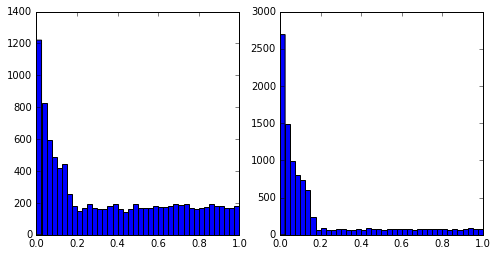

In [57]:
plt.figure(figsize = (8,4))
plt.subplot(1,2, 1)
plt.hist(p1, 40)
plt.subplot(1,2, 2)
plt.hist(p2, 40)

In [22]:
x1 = np.array(p1)
x2 = np.array(p2)

(0, 10)

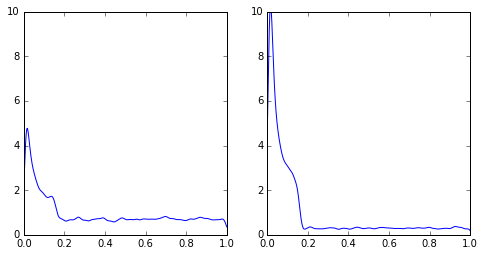

In [23]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(x1[:, np.newaxis])
x_test = np.concatenate( [np.arange(0,0.1,0.00001), np.arange(0.1,1,0.0001)], 0)
log_pdf = kde1.score_samples(x_test[:, np.newaxis])
pdf = np.exp(log_pdf)
plt.figure(figsize = (8,4))
plt.subplot(1,2, 1)
plt.plot(x_test, pdf)
plt.ylim([0,10])

kde2 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(x2[:, np.newaxis])
log_pdf2 = kde2.score_samples(x_test[:, np.newaxis])
pdf2 = np.exp(log_pdf2)

plt.subplot(1, 2, 2)
plt.plot(x_test, pdf2)
plt.ylim([0,10])


In [24]:
fa1 = np.mean(pdf[x_test>0.8])
fb1 = np.mean(pdf2[x_test>0.8])
print(fa1, fb1)

(0.69511867576684216, 0.29634547911825843)


In [25]:
na = len(x1)
nb = len(x2)

In [26]:
fa = pdf
fb = pdf2

In [27]:
ta_large = 1.0
ta_small = 0.0

tas = []
fdrs = []
tds = []
tbs = []
for ta in np.arange(0,0.5, 0.001):

    fa_t = np.exp(kde1.score_samples(np.array([[ta]])))[0]

    #print np.min(np.abs(fb[fb< 0.5] - fa_t))
    tb = x_test[np.where(np.abs(fb - fa_t) == np.min(np.abs(fb - fa_t)))[0]][0]

    #print ta,fa_t, tb
    fp = ta * fa1 * na + tb * fb1 * nb
    td = sum(x1 < ta) + sum(x2 < tb)

    fdr = fp/float(td)
    
    tas.append(ta)
    tbs.append(tb)
    fdrs.append(fdr)
    tds.append(td)

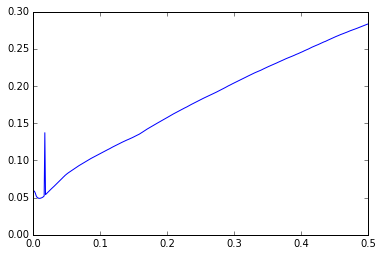

In [28]:
plt.plot(tas, fdrs)

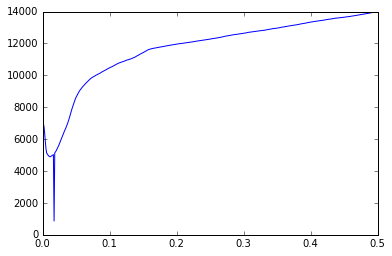

In [29]:
plt.plot(tas, tds)

In [30]:
fdrs = np.array(fdrs)[1:]
idx = np.where(np.min(np.abs(fdrs - 0.1)) == np.abs(fdrs - 0.1))[0]

In [46]:
print tds[idx[0]]
print tbs[idx[0]]
print tas[idx[0]]
ta_opt = tas[idx[0]]
tb_opt = tbs[idx[0]]


10017
0.1487
0.08


In [32]:
df.to_csv('1.csv')

In [48]:
sum(h_1[x1 < ta_opt]) + sum(h_2[x2 < tb_opt])

9076

In [49]:
sum(x1 < ta_opt) + sum(x2 < tb_opt)

10017

In [55]:
precision = float(sum(h_1[x1 < ta_opt]) + sum(h_2[x2 < tb_opt])) / float(sum(x1 < ta_opt) + sum(x2 < tb_opt))
print precision

0.906059698513


In [54]:
recall = float(sum(h_1[x1 < ta_opt]) + sum(h_2[x2 < tb_opt]))/ (sum(h_1) + sum(h_2))
print recall

0.898524898525


In [56]:
fdr = 1 - precision
print fdr

0.0939403014875
